In [4]:
pip install yfinance pandas matplotlib statsmodels

Note: you may need to restart the kernel to use updated packages.


## Download Historical Stock Data:
Use the yfinance library to download stock price data for Tata Steel Limited.

In [6]:
import yfinance as yf
import pandas as pd

# Ticker symbol for Tata Steel Limited
ticker = 'TATASTEEL.NS'
stock_data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
stock_data.to_csv('stock_data.csv')  # Save the data for future use

[*********************100%%**********************]  1 of 1 completed


## Graphical Representation of Stock Movement

Use matplotlib to visualize Tata Steel’s stock price movement.

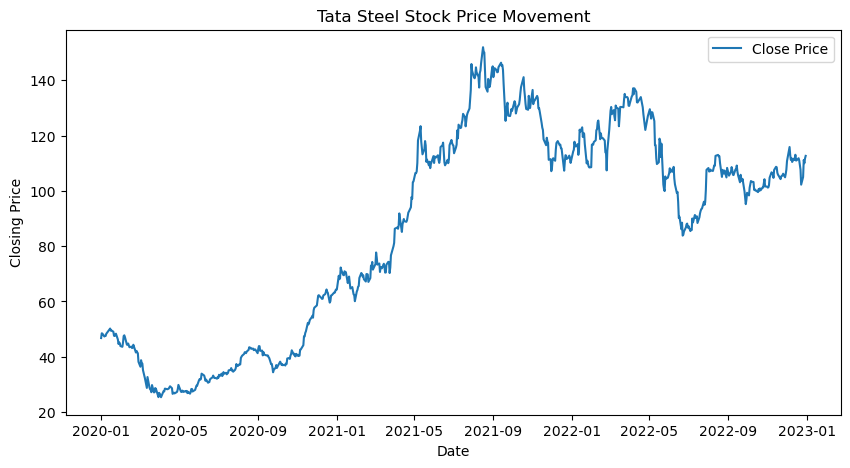

In [8]:
import matplotlib.pyplot as plt

# Load the data
stock_data = pd.read_csv('stock_data.csv', index_col='Date', parse_dates=True)

# Plot the closing prices
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'], label='Close Price')
plt.title('Tata Steel Stock Price Movement')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Test for Stationarity

Perform the Augmented Dickey-Fuller (ADF) Test:
Use the statsmodels library to test for stationarity.

In [14]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(stock_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.015882429908231
p-value: 0.7474275633912844


## Running Regression Model and Testing for Endogeneity Error

### Prepare the Data for Regression:

Create lagged variables and prepare the data for regression analysis.

In [17]:
stock_data['Lagged_Close'] = stock_data['Close'].shift(1)
stock_data.dropna(inplace=True)

### Run the Regression Model:
Use statsmodels to run the regression model.

In [20]:
import statsmodels.api as sm

X = stock_data[['Lagged_Close']]
y = stock_data['Close']
X = sm.add_constant(X)  # Add a constant term to the predictor

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.833e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        01:37:21   Log-Likelihood:                -1704.3
No. Observations:                 746   AIC:                             3413.
Df Residuals:                     744   BIC:                             3422.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2978      0.219      1.361   